<a href="https://colab.research.google.com/github/DeepMalviya1/YBI-Foundation/blob/main/Diabetes_Deep_Malviya_YBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Diabetes.csv')

# Data Observation

In [3]:
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe(include='all')

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking Null values and Preprocessing

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

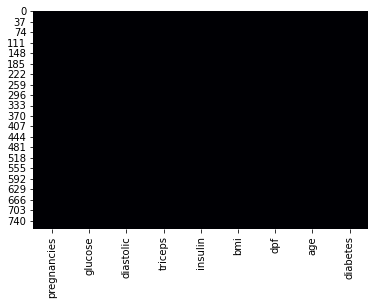

In [6]:
sns.heatmap(data.isnull(),cbar = False, cmap = 'magma')
data.isnull().sum()

In [7]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [8]:
error = ['glucose', 'diastolic', 'triceps', 'insulin','bmi', 'dpf']
data[error].isin([0]).sum()

glucose        5
diastolic     35
triceps      227
insulin      374
bmi           11
dpf            0
dtype: int64

In [9]:
data[error] = data[error].replace(0, np.NaN)
data.isnull().sum()

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.NaN, strategy="mean")
data[error] = si.fit_transform(data[error])

In [11]:
data.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


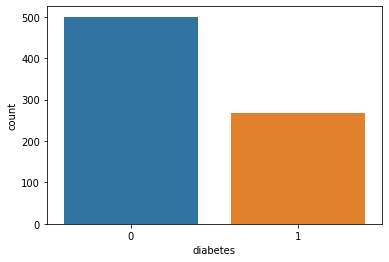

In [12]:
sns.countplot(data['diabetes'])

In [13]:
data['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [14]:
from sklearn.utils import resample
data_major = data[(data['diabetes']==0)]
data_minor = data[(data['diabetes']==1)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = 500,
                    random_state= 42)
df = pd.concat([upsample, data_major])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    500
0    500
Name: diabetes, dtype: int64

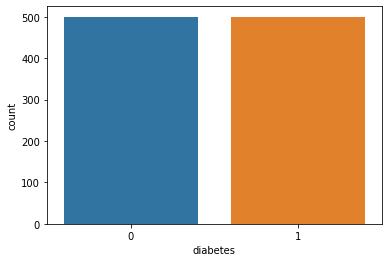

In [15]:
sns.countplot(df['diabetes'])
df['diabetes'].value_counts()

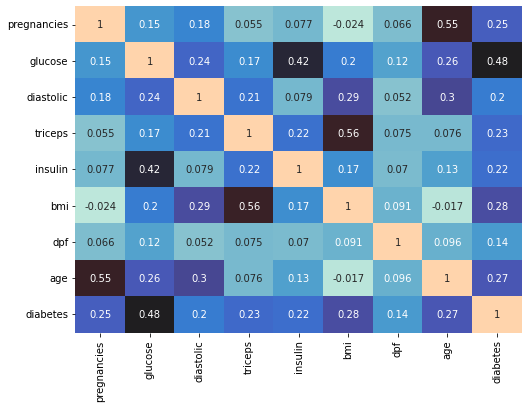

In [16]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr,annot = True,cbar = False, cmap = 'icefire')

# Data Split

In [17]:
X = df.drop('diabetes',1)
y = df['diabetes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42529)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 8), (300, 8), (700,), (300,))

# Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Model Implementation

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

# Result

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
print(classification_report(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
cm = confusion_matrix(y_test,pred_rf)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       156
           1       0.81      0.93      0.86       144

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

[[124  32]
 [ 10 134]]


Text(0.5, 33.0, 'Predicted Values')

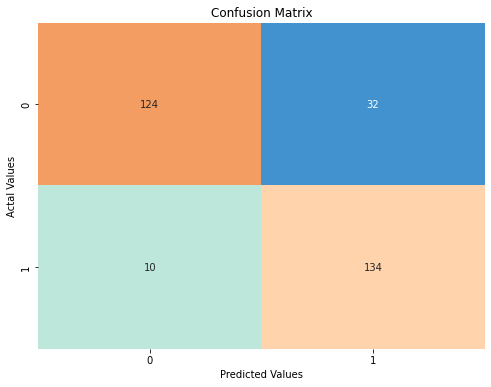

In [23]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot = True, cmap = 'icefire',cbar = False, fmt = 'g')

plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')